<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_C_DS_DeepLearning_Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange><b>Deep Learning: previsão com Keras</b></font>

<font color=gray size=2><a href=https://colab.research.google.com/drive/1STGO5gr4pSsK_cwowovBK1uYIMDDNoGE>Arquivo Colab</a></font>

<ul><font size=2 color=gray>FICHA TÉCNICA
<li><a href=https://cursos.alura.com.br/course/deep-learning-previsao-keras><font size=2 color=gray>Deep Learning: previsão com Keras</a>
<li>Carga Horária: 10 h
<li>Instrutora: Allan Spadini
<li>Data de Início: 08-2022
</ul>

<hr color=gray><br>
<h3><b>Conteúdo / Aprendizagem:</b></h3>

<font color=orange><b>PRE-PROCESSAMENTO</b></font>
- Separação dos conjuntos (x,y,treino e teste)
- Escalonamento de vetores
    
<font color=orange><b>MODELOS DE DEEP LEARNING</b></font>
- Modelo de Rede Neural de regressão linear com o Keras
- Modelo de Rede Neural de não-linear com o Keras
- Modelo de Rede Recorrente
    - Modelo LSTM
    - Modelo GRU
- Avaliação de modelo
    - Obtenção dos valores em verdadeira grandeza

<font color=orange><b>SÉRIES TEMPORAIS</b></font>
- Datas como x
- Próprio vetor como x
    - Janelas de deslocamento
    

+ E se utilizarmos médias móveis?
+ E na previsão de valores ações? É eficiente?

# <font color=orange><b>RESUMO</b></font>

<a href=https://docs.google.com/spreadsheets/d/1tTygYlq9r7nkUsw9a25N5_z57-de_59tSBCIVPw6KUw><font size=2 color=gray>ROTEIROS Data Science</font></a>

* <font color=orange><b>

* 

# <font color=orange><b>CURSO</b></font>

**Projeto**: neste curso será abordado o uso do Keras para elaboração de estudos preditivos de séries temporais.

Essa operação é interessante quando deseja-se realizar um **planejamento futuro**.


<a href=https://github.com/alura-cursos/deeptime/archive/aula5.zip><font size=2; color=gray>Material de referencial do curso</font></a>

## <font color=orange>Carga de dados</font>

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [88]:
# Download dos dados
uri = 'https://github.com/alura-cursos/deeptime/raw/aula1/Passageiros.csv'

passageiros = pd.read_csv(uri)
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


## <font color=orange>Descrição</font>

In [89]:
# Configuração da imagem
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 12

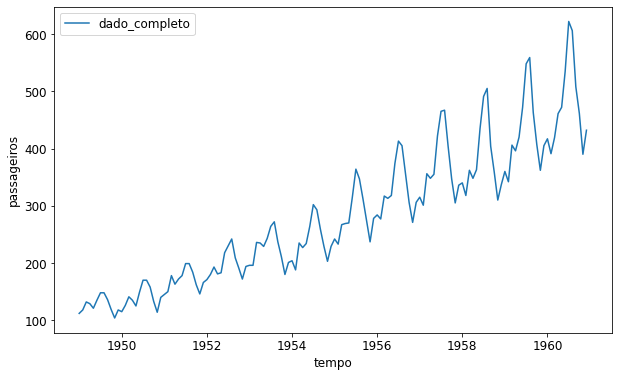

In [90]:
# Visualização da série temporal
sns.lineplot(data=passageiros, x='tempo', y='passageiros', label='dado_completo')

# <font color=orange><b>Modelagem</b></font>



<font color=orange>PERGUNTA DE NEGÓCIO:</font> Quantos serão os passageiros no futuro?

## <font color=orange><b>Pre-processamento</b></font>

### <font color=orange>Escalando vetores</font>

Para treinar o modelo com redes neurais é recomendado que os dados estejam todos na mesma escala.

Estudar o impacto de:

* Padronização
* Escala de Mín e Máx



* Escalar com todos os dado?
* Escalar somente os dados de treino?

In [91]:
# Normalização - padronização
from sklearn.preprocessing import StandardScaler
# Por que não o MinMax

sc = StandardScaler()
dado_escalado = sc.fit_transform(passageiros)
# -> np.Array

### <font color=orange>Separação de X e Y</font>

In [92]:
# X e Y
x = dado_escalado[:,0]  # Features - Características - Tempo
y = dado_escalado[:,1]  # Alvo - Número de passageiros

Text(0.5, 0, 'Data')

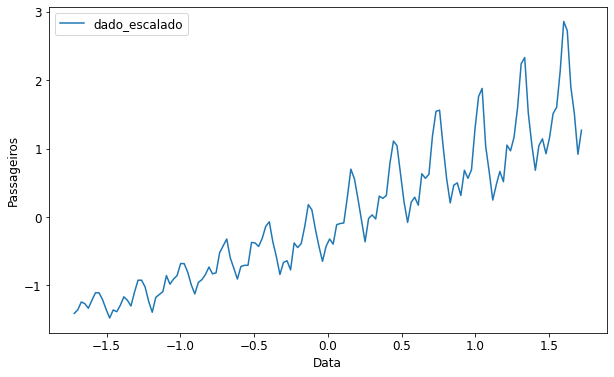

In [93]:
# Visualização
sns.lineplot(x=x,y=y, label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

### <font color=orange>Separação de Treino e Teste</font>

A separação dos dados em treino e teste deve seguir a ordem cronológica dos dados, já que queremos saber como o modelo irá prever os valores do futuro.

In [94]:
# Treino e teste - em séries temporais
tamanho_treino = int(len(passageiros) * 0.9)  # 90% dos dados
# tamanho_teste = len(passageiros) - tamanho_treino  # 10% dos dados

In [95]:
# X e Y de Treino e Teste
xtreino = x[ :tamanho_treino]
ytreino = y[ :tamanho_treino]

xteste = x[tamanho_treino: ]
yteste = y[tamanho_treino: ]

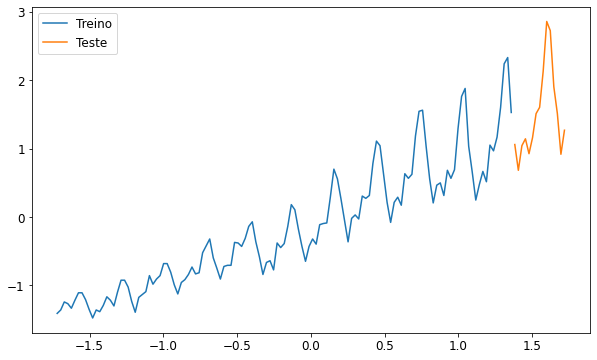

In [96]:
sns.lineplot(x=xtreino, y=ytreino, label='Treino')
sns.lineplot(x=xteste, y=yteste, label='Teste')

## <font color=orange>Formulação do modelo linear</font>

Um modelo de rede neurais é um conjunto de inúmeras funções mais simples, compostas para gerar um resultado mais complexo.

$$z = W*x + b$$

- $W$ - Weights
- $b$ - Bias

<center>Entrada [ Data ] → FUNÇÃO DP → Saída [ Passageiros ]</center>

![Esquema de rede neural](https://lh3.googleusercontent.com/jcK3PwyJCzuNV9oHD1wYxnATGVLupvrvDRodBGPhzWdOOC-iHo7mH90pRrBLn9PRkF4FRnddZ2hFgA8ZPf9Mhlpes0J9I11Xb-EjKAjrStdVUgK7_9_b4cElUu0YWkHp8QEJUseJ0SnFl4xGq2Y7sHI)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Modelo de 1 núcleo e saída de 1 valor
regressor = Sequential()
regressor.add(Dense(
    units = 1,  # número de dimensões da saída
    input_dim = 1,  # len(X) = 1
    kernel_initializer='Ones',  # pesos da camada de entrada = 1
    use_bias = False,
    activation = 'linear'
    )
)

regressor.compile(loss='mean_squared_error',
    optimizer='adam')

* activation - `linear` é para funções lineares
* units - número de núcleos (funções)


### <font color=orange>Resumo do modelo</font>

Com o modelo construído podemos avaliar o que o Keras gerou de rede neural.

In [98]:
# Resumo do modelo
regressor.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [99]:
# Treino do modelo
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 0s 2ms/step - loss: 0.1284


In [100]:
# Prevendo os dados de treino (o ajuste)
y_predict = regressor.predict(xtreino)   

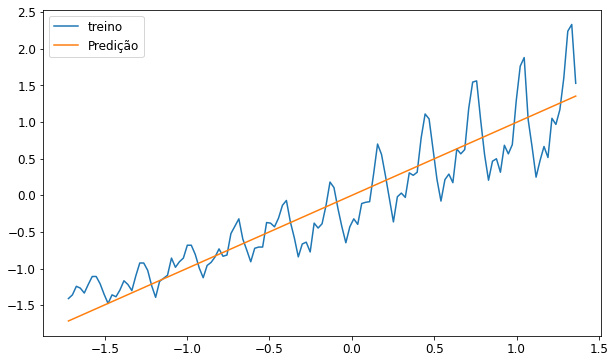

In [101]:
# Figura Série, Modelo
sns.lineplot(x=xtreino, y=ytreino, label='treino')  # Série Temporal
sns.lineplot(x=xtreino, y=y_predict[:,0], label='Predição')  # Modelo treinado

### <font color=orange>Reescalando variáveis</font>

Voltando os dados para a escala original.

`scaler.inverse_transform(df)`

In [102]:
# DataFrame dos vetores
d = {'tempo': xtreino,
     'passageiros': y_predict[:,0]}

resultados = pd.DataFrame(d)
resultados

,tempo,passageiros
0,-1.720064,-1.713498
1,-1.696007,-1.689533
2,-1.671950,-1.665568
3,-1.647894,-1.641603
4,-1.623837,-1.617638
...,...,...
124,1.262984,1.258163
125,1.287041,1.282128
126,1.311098,1.306093
127,1.335155,1.330058


In [103]:
# Transformação reversa
resultado_transf = sc.inverse_transform(resultados)  # -> np.array
resultado_transf = pd.DataFrame(resultado_transf, columns=['tempo','passageiros'])
resultado_transf

,tempo,passageiros
0,1949.000000,75.451539
1,1949.083333,78.316532
2,1949.166667,81.181525
3,1949.250000,84.046518
4,1949.333333,86.911525
...,...,...
124,1959.333333,430.710789
125,1959.416667,433.575796
126,1959.500000,436.440789
127,1959.583333,439.305768


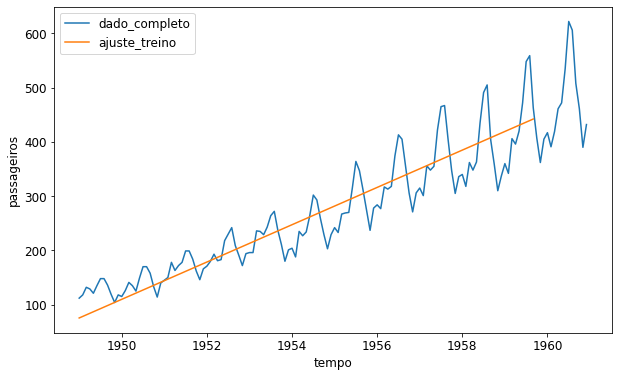

In [104]:
# Figura: Série temporal completa, modelo ajustado
sns.lineplot(data=passageiros,
    x='tempo', y='passageiros', label='dado_completo')

sns.lineplot(data=resultado_transf,
    x='tempo', y='passageiros', label='ajuste_treino')

In [105]:
# Prevendo os dados de teste (o futuro)
y_predict_teste = regressor.predict(xteste)  

In [106]:
# Tabulação dos vetores
d = {'tempo': xteste,
     'passageiros': y_predict_teste[:,0]}
resultados = pd.DataFrame(d)

# Transformação reversa
resultado_transf_teste = sc.inverse_transform(resultados)
resultado_transf_teste = pd.DataFrame(resultado_transf_teste, columns=['tempo','passageiros'])
resultado_transf_teste

,tempo,passageiros
0,1959.750000,445.035768
1,1959.833333,447.900761
2,1959.916667,450.765754
3,1960.000000,453.630746
4,1960.083333,456.495739
5,1960.166667,459.360732
6,1960.250000,462.225739
7,1960.333333,465.090718
8,1960.416667,467.955711
9,1960.500000,470.820718


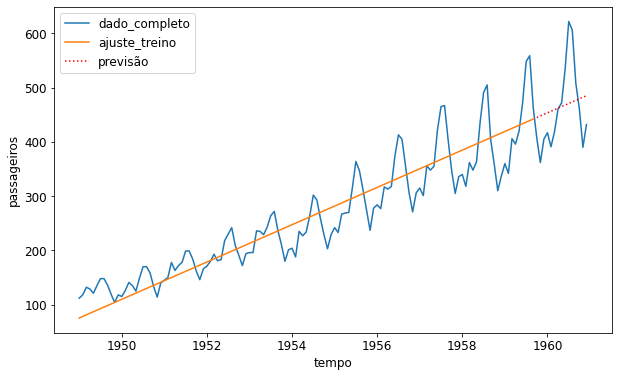

In [107]:
# Figura: Série temporal completa, Modelo ajustado, Previsão

# Série temporal completa
sns.lineplot(data=passageiros,
    x='tempo', y='passageiros', label='dado_completo')

# Modelo ajustado
sns.lineplot(data=resultado_transf,
    x='tempo', y='passageiros', label='ajuste_treino')

# Previsão
sns.lineplot(data=resultado_transf_teste,
    x='tempo', y='passageiros', label='previsão', color='r', linestyle=':')

# <font color=orange>Modelo - Não-Linear</font>

Antes foi testado uma rede neural para uma **função linear**. Mas muitas vezes os casos não podem ser representados por modelos lineares. Então aqui será apresentado a criação de um modelo não-linear sigmoide.


## Sigmoid

In [108]:
# Modelo não-linear (composição de funções lineares)
regressor2 = Sequential()

regressor2.add(Dense(
    units=8, input_dim=1, 
    kernel_initializer='random_uniform',
    activation='linear', use_bias=False
))
regressor2.add(Dense(
    units=32,
    kernel_initializer='random_uniform',
    activation='sigmoid', use_bias=False
))
regressor2.add(Dense(
    units=1,
    kernel_initializer='random_uniform',
    activation='linear', use_bias=False
))

# Compilador
regressor2.compile(loss='mean_squared_error',
    optimizer='adam')

In [109]:
# Resumo do modelo
regressor2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 8)                 8         
                                                                 
 dense_53 (Dense)            (None, 32)                256       
                                                                 
 dense_54 (Dense)            (None, 1)                 32        
                                                                 
Total params: 296
Trainable params: 296
Non-trainable params: 0
_________________________________________________________________


In [110]:
%%time
# Treinamento do modelo
regressor2.fit(xtreino, ytreino, 
    epochs=200
    )

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8140
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8026
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8077
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8061
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8007
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7880
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7811
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7764
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7721
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7705
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7714
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7668
Epoch 13/200
5/5 [==============================] - 0s 2ms/st

In [111]:
# Predições
y_predict = regressor2.predict(xtreino)   #Prevendo os dados de treino (o ajuste)
y_predict_teste = regressor2.predict(xteste)   #Prevendo os dados de teste(o futuro)

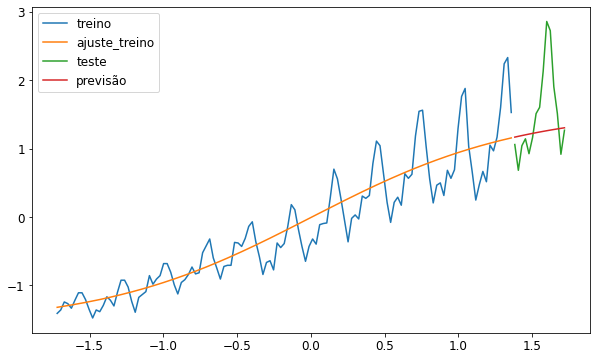

In [112]:
# Figura: Série temporal completa, Modelo ajustado, Previsão
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão')


## Relu

[Keras](https://keras.io/api/layers/activations/#relu-function)

Applies the rectified linear unit activation function.

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 32)                64        
                                                                 
 dense_56 (Dense)            (None, 32)                1056      
                                                                 
 dense_57 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
5/5 [==============================] - 1s 3ms/step - loss: 0.8076
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8025
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7965
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7883
Epo

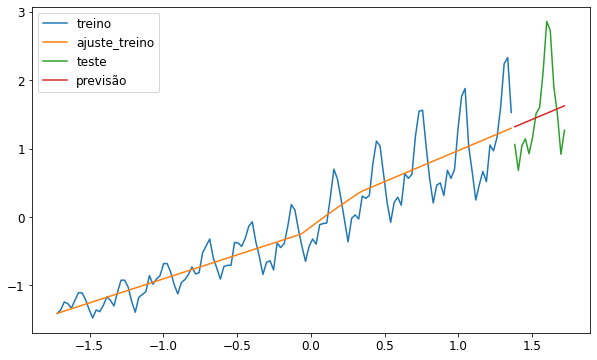

In [113]:
# Modelo não-linear (composição de funções)
regressor2 = Sequential()

regressor2.add(Dense(
    units=32, input_dim=1, 
    kernel_initializer='random_uniform',
    activation='linear', use_bias=True
))
regressor2.add(Dense(
    units=32,
    kernel_initializer='random_uniform',
    activation='relu', use_bias=True
))
regressor2.add(Dense(
    units=1,
    kernel_initializer='random_uniform',
    activation='linear', use_bias=True
))

# Compilador
regressor2.compile(loss='mean_squared_error',
    optimizer='adam')


# Resumo do modelo
regressor2.summary()

# Treinamento do modelo
regressor2.fit(xtreino, ytreino, 
    epochs=200
    )

# Predições
y_predict = regressor2.predict(xtreino)   #Prevendo os dados de treino (o ajuste)
y_predict_teste = regressor2.predict(xteste)   #Prevendo os dados de teste(o futuro)

# Figura: Série temporal completa, Modelo ajustado, Previsão
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão')


## softplus

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 32)                64        
                                                                 
 dense_59 (Dense)            (None, 32)                1056      
                                                                 
 dense_60 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8322
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8055
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8003
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7908
Epo

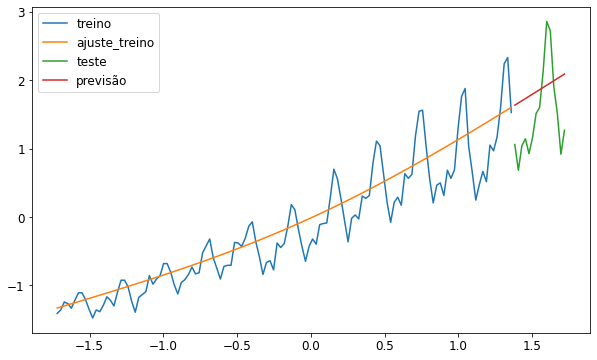

In [114]:
# Modelo não-linear (composição de funções)
regressor2 = Sequential()

regressor2.add(Dense(
    units=32, input_dim=1, 
    kernel_initializer='random_uniform',
    activation='linear', use_bias=True
))
regressor2.add(Dense(
    units=32,
    kernel_initializer='random_uniform',
    activation='softplus', use_bias=True
))
regressor2.add(Dense(
    units=1,
    kernel_initializer='random_uniform',
    activation='linear', use_bias=True
))

# Compilador
regressor2.compile(loss='mean_squared_error',
    optimizer='adam')


# Resumo do modelo
regressor2.summary()

# Treinamento do modelo
regressor2.fit(xtreino, ytreino, 
    epochs=200
    )

# Predições
y_predict = regressor2.predict(xtreino)   #Prevendo os dados de treino (o ajuste)
y_predict_teste = regressor2.predict(xteste)   #Prevendo os dados de teste(o futuro)

# Figura: Série temporal completa, Modelo ajustado, Previsão
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão')


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 32)                64        
                                                                 
 dense_62 (Dense)            (None, 32)                1056      
                                                                 
 dense_63 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7840
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7778
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7752
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7701
Epo

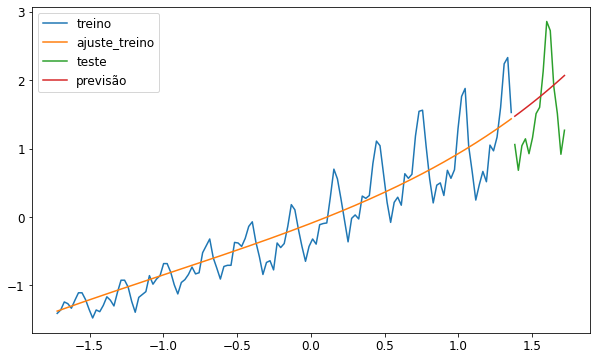

In [115]:
# Modelo não-linear (composição de funções)
regressor2 = Sequential()

regressor2.add(Dense(
    units=32, input_dim=1, 
    kernel_initializer='random_uniform',
    activation='linear', use_bias=True
))
regressor2.add(Dense(
    units=32,
    kernel_initializer='random_uniform',
    activation='exponential', use_bias=True
))
regressor2.add(Dense(
    units=1,
    kernel_initializer='random_uniform',
    activation='linear', use_bias=True
))

# Compilador
regressor2.compile(loss='mean_squared_error',
    optimizer='adam')


# Resumo do modelo
regressor2.summary()

# Treinamento do modelo
regressor2.fit(xtreino, ytreino, 
    epochs=200
    )

# Predições
y_predict = regressor2.predict(xtreino)   #Prevendo os dados de treino (o ajuste)
y_predict_teste = regressor2.predict(xteste)   #Prevendo os dados de teste(o futuro)

# Figura: Série temporal completa, Modelo ajustado, Previsão
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão')


# <font color=orange>Nova concepção do problema - ($t+1$)</font>

Ao invés de prever o número de passageiros segundo a data (<font color=orange>$f(\text{data})=\text{passageiros}$</font>), podemos tentar prever o número de passageiros dado a sequencia anterior de passageiros.

<font color=orange>$f(\text{passageiros}_{t-1})=\text{passageiros}_{t}$</font>

> "Passar os valores de y tanto como entrada quanto como saída. A entrada deve ter uma série de valores anteriores para predizer um valor futuro."

> Agora x e y vão valores diferentes. X vai conter o número de passageiros em um tempo anterior e y vai conter o número de passageiros em t+1, por exemplo. 

## <font color=orange>Construção das sequencias</font>

In [116]:
import numpy as np

# Função para criar uma lista de janelas de dados
def separa_dados(vetor,n_passos):
    """Entrada: vetor: número de passageiros
                n_passos: número de passos no regressor
        Saída:
                X_novo: Array 2D (t-1)
                y_novo: Array 1D - Nosso alvo (t)
    """
    X_novo, y_novo = [], []
    vetor_length = vetor.shape[0]
    for i in range(n_passos, vetor_length):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
    return X_novo, y_novo

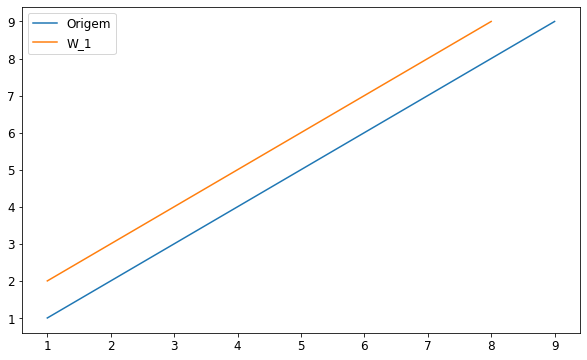

In [117]:
#### Teste de comportamento linear de t+1
import numpy as np
_x = np.arange(1, 10)
_y = _x[1:]

sns.lineplot(x=_x, y=_x, label='Origem')
sns.lineplot(x=_x[:-1], y=_y, label='W_1')

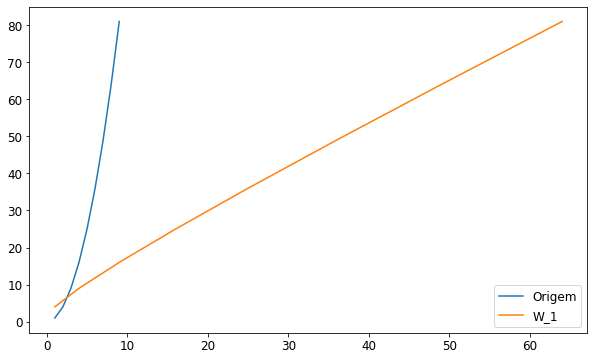

In [129]:
#### Teste de comportamento exponencial de t+1
import numpy as np
_i = np.arange(1, 10)
_x = _i**2

sns.lineplot(x=_i, y=_x, label='Origem')
sns.lineplot(x=_x[:-1], y=_x[1:], label='W_1')

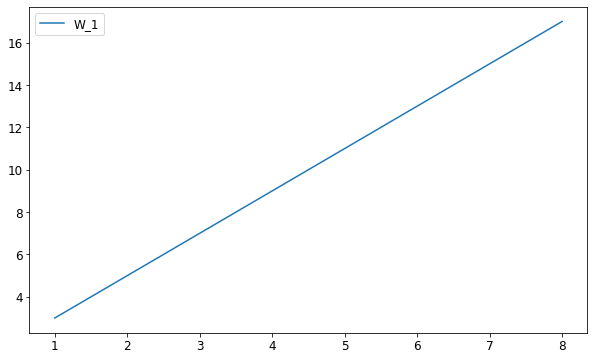

In [142]:
#### Teste de comportamento exponencial de t+1
import numpy as np
_i = np.arange(1, 10)
_x = _i**2
d_x = _x[1:] - _x[:-1]

sns.lineplot(x=_i[:-1], y=d_x, label='W_1')

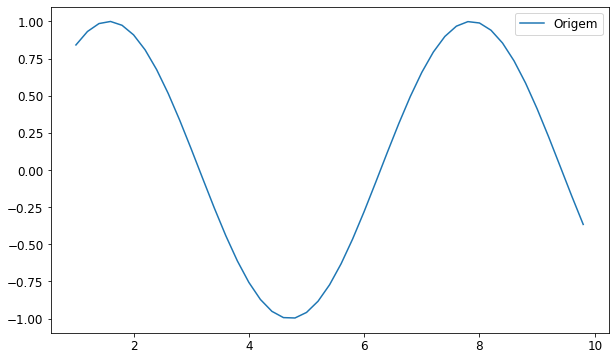

In [143]:
#### Teste de comportamento senoidal de t+1
import numpy as np
_i = np.arange(1, 10, 0.2)
_x = np.sin(_i)
sns.lineplot(x=_i, y=_x, label='Origem')

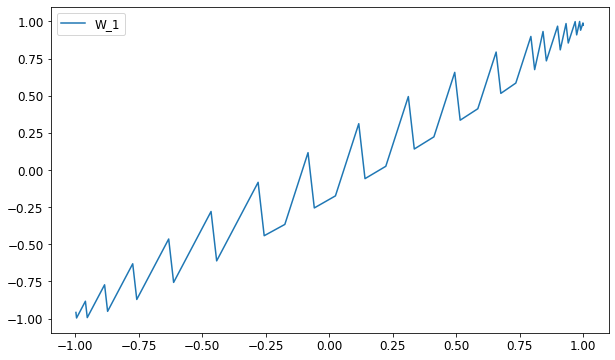

In [144]:

sns.lineplot(x=_x[:-1], y=_x[1:], label='W_1')

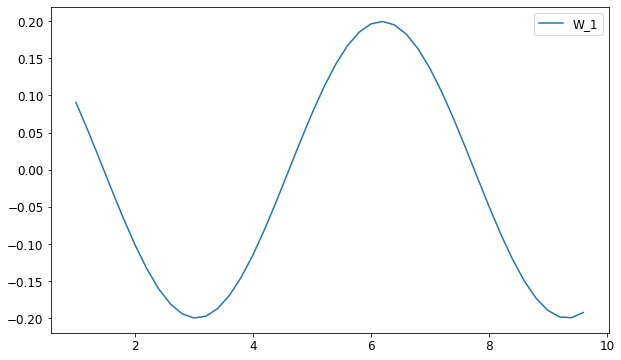

In [148]:
import numpy as np
_i = np.arange(1, 10, 0.2)
_x = np.sin(_i)
d_x = _x[1:] - _x[:-1]

sns.lineplot(x=_i[:-1], y=d_x, label='W_1')

---

In [ ]:
# TREINO
vetor_treino = pd.DataFrame(ytreino)[0]

xtreino_w1, ytreino_w1 = separa_dados(vetor_treino, 1)

In [ ]:
# X
xtreino_w1[:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [ ]:
# Y
ytreino_w1[:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [ ]:
# TESTE
vetor_teste = pd.DataFrame(yteste)[0]
xteste_w1, yteste_w1 = separa_dados(vetor_teste, 1)

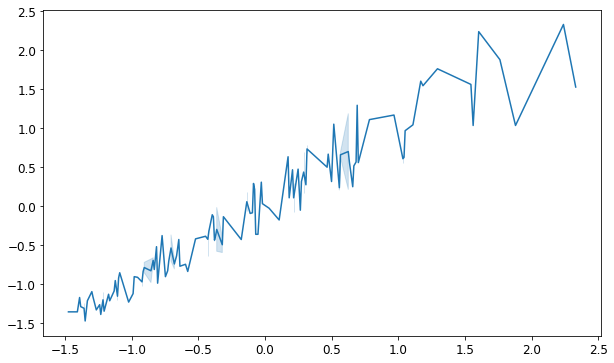

In [ ]:
# Figura de X(t) e Y(t-1) 
sns.lineplot(x=xtreino_w1[:,0], y=ytreino_w1)

## <font color=orange>Treinando modelo</font>

In [ ]:
# Modelo linear + sigmoid
regressor3 = Sequential()

regressor3.add(Dense(
    units=8, input_dim=1,
    kernel_initializer='ones',
    activation='linear',
    use_bias=False
))
regressor3.add(Dense(
    units=64,
    kernel_initializer='random_uniform',
    activation='sigmoid',
    use_bias=False
))
regressor3.add(Dense(
    units=1,
    kernel_initializer='random_uniform',
    activation='linear',
    use_bias=False
))

regressor3.compile(loss='mean_squared_error', optimizer='adam')

regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)
y_predict_novo = regressor3.predict(xtreino_novo)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7683
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7474
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7265
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7067
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6832
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6584
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6313
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6007
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5677
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5284
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4914
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4473
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

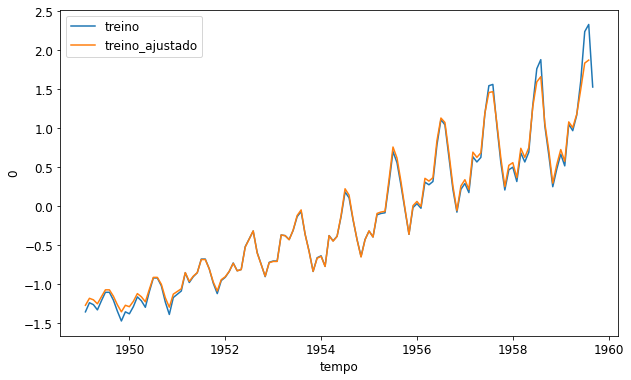

In [ ]:
_dados_treino_passo = passageiros[1:129]

sns.lineplot(x='tempo', y=ytreino_novo, data=_dados_treino_passo, label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=_dados_treino_passo, label='treino_ajustado')

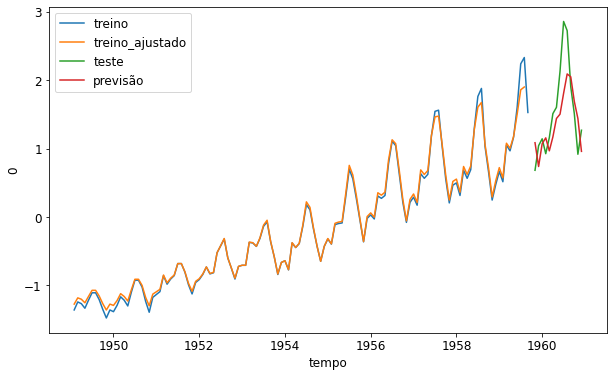

In [ ]:
y_predict_teste_novo = regressor3.predict(xteste_novo)


_dados_treino_passo = passageiros[1 : 129]
_dados_teste_passo = passageiros[129+1 : 144]

# Treino
sns.lineplot(x='tempo', y=ytreino_novo, label='treino', data=_dados_treino_passo)
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], label='treino_ajustado', data=_dados_treino_passo)
# Teste
sns.lineplot(x='tempo', y=yteste_novo, label='teste', data=_dados_teste_passo)
sns.lineplot(x='tempo', y=y_predict_teste_novo[:,0], label='previsão', data=_dados_teste_passo)

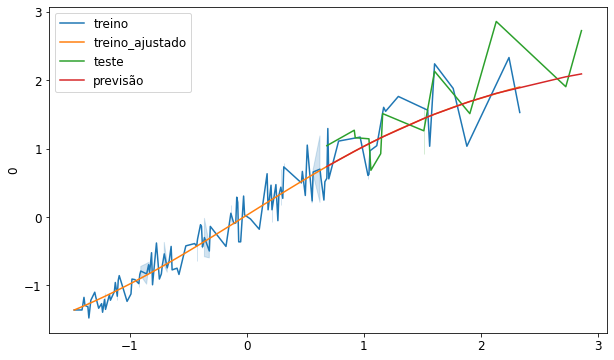

In [ ]:
# Treino
sns.lineplot(x=xtreino_novo[:,0], y=ytreino_novo, label='treino')  # Dados de treino
sns.lineplot(x=xtreino_novo[:,0], y=pd.DataFrame(y_predict_novo)[0], label='treino_ajustado')  # Ajuste no treino

# Teste
sns.lineplot(x=xteste_novo[:,0], y=yteste_novo, label='teste',)
sns.lineplot(x=xteste_novo[:,0], y=y_predict_teste_novo[:,0], label='previsão')

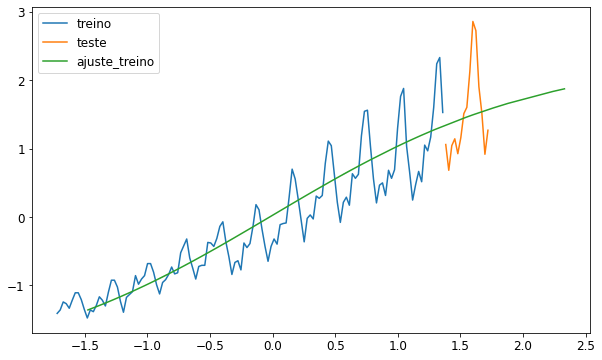

In [ ]:
# !!! Não faz sentido a comparação - 
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')

sns.lineplot(x=xtreino_novo[:,0], y=y_predict_novo[:,0], label='ajuste_treino')


# <font color=orange>Modelo Multiplos passados (janelas)</font>


In [ ]:
xtreino_w4, ytreino_w4 = separa_dados(vetor_treino, 4)
xteste_w4, yteste_w4 = separa_dados(vetor_teste, 4)

In [ ]:
regressor4 = Sequential()

regressor4.add(Dense(
    units=8, input_dim=4,  # -----
    kernel_initializer='ones',
    activation='linear',
    use_bias=False
))
regressor4.add(Dense(
    units=64,
    kernel_initializer='random_uniform',
    activation='sigmoid',
    use_bias=False
))
regressor4.add(Dense(
    units=1,
    kernel_initializer='random_uniform',
    activation='linear',
    use_bias=False
))

regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor4.fit(xtreino_w4, ytreino_w4, epochs=300)

y_predict_treino_w4 = regressor4.predict(xtreino_w4)
y_predict_teste_w4 = regressor4.predict(xteste_w4)

Epoch 1/300
4/4 [==============================] - 1s 5ms/step - loss: 0.7475
Epoch 2/300
4/4 [==============================] - 0s 11ms/step - loss: 0.6542
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5805
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5172
Epoch 5/300
4/4 [==============================] - 0s 8ms/step - loss: 0.4550
Epoch 6/300
4/4 [==============================] - 0s 9ms/step - loss: 0.3920
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 0.3362
Epoch 8/300
4/4 [==============================] - 0s 8ms/step - loss: 0.2777
Epoch 9/300
4/4 [==============================] - 0s 12ms/step - loss: 0.2314
Epoch 10/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1965
Epoch 11/300
4/4 [==============================] - 0s 6ms/step - loss: 0.1713
Epoch 12/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1549
Epoch 13/300
4/4 [==============================] - 0s 11ms

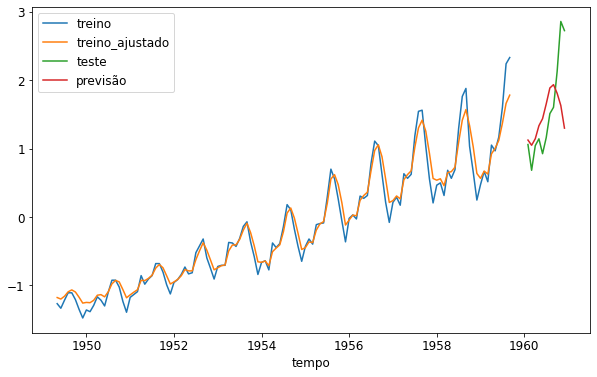

In [ ]:
w = 4
_dados_treino_passo = passageiros[w : 129]
_dados_teste_passo = passageiros[129+w : 144]

resultado_treino = pd.DataFrame(y_predict_treino_w4)[0].values
resultado_teste = y_predict_teste_w4[:,0]

# Treino
sns.lineplot(x='tempo', y=xtreino_w4[:,-1], label='treino', data=_dados_treino_passo)
sns.lineplot(x='tempo', y=resultado_treino, label='treino_ajustado', data=_dados_treino_passo)
# Teste
sns.lineplot(x='tempo', y=xteste_w4[:,0], label='teste', data=_dados_teste_passo)
sns.lineplot(x='tempo', y=resultado_teste, label='previsão', data=_dados_teste_passo)

# <font color=orange><b>Redes Recorrentes</b></font>

A arquitetura de rede não entende o caráter **sequencial** das séries temporais, onde cada uma ds observações está correlacionada. Esta correlação pode ser entendida como um espécie de memória do que ocorreu na própria série temporal.

As **redes recorrentes** surgiram como uma alternativa para processamento de sequências. Neste tipo de processamento, o aprendizado ocorre por meio de *loops*.



![Redes Recorrentes](https://lh4.googleusercontent.com/Tm4H47qzhm69HOspl4H8w2xFMKQrEJPiLT44cQk-Qzd6Be1Uj-_HJ9ka12yoKKqGop0VoYjTeeYqYc5a1i-8viGcyyqr8L2pFbb1HgU4NOvAfIboyLyFxrlBn2y-wyrm0_S8hAKeStxh4yq7nVkCdfI)

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
uri = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv'

bikes = pd.read_csv(uri)
bikes.sample(3)

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
11071,2016-04-12 04:00:00,25,9.0,7.5,94.0,10.0,7.0,0.0,0.0,0.0
478,2015-01-23 23:00:00,299,8.0,4.0,87.0,24.0,7.0,0.0,0.0,3.0
5635,2015-08-27 10:00:00,999,17.5,17.5,72.5,24.0,2.0,0.0,0.0,1.0


In [ ]:
bikes.dtypes

datas           object
contagem         int64
temperatura    float64
sensacao       float64
umidade        float64
vel_vento      float64
clima          float64
feriado        float64
final_ds       float64
estacao        float64
dtype: object

In [ ]:
bikes['datas'] = pd.to_datetime(bikes['datas'])

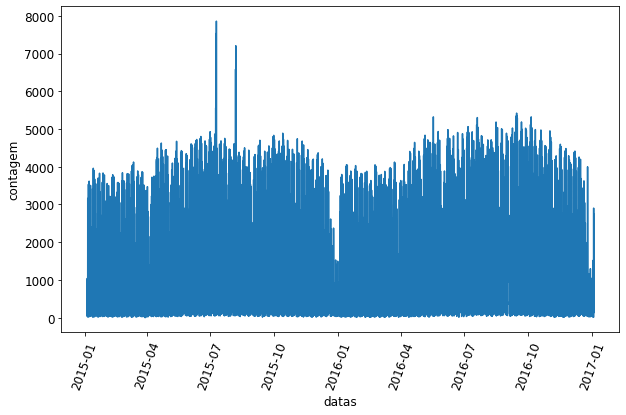

In [ ]:
ax = sns.lineplot(x='datas', y='contagem', data=bikes)
plt.xticks(rotation=70)
ax=ax

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_bikes = StandardScaler()
data = bikes['contagem'].values.reshape(-1,1)  # values -> array; reshape -> itens dentro de lista em uma grande lista
sc_bikes.fit(data)

StandardScaler()

In [ ]:
# Vetor y
y = sc_bikes.transform(data)

In [ ]:
# Treino e Teste de y
tamanho_treino = int(len(y) * 0.9)

ytreino = y[:tamanho_treino]
yteste  = y[tamanho_treino:]

In [ ]:
# Treino e Teste de x
xtreino = bikes[['datas']][:tamanho_treino]
xteste  = bikes[['datas']][tamanho_treino:]

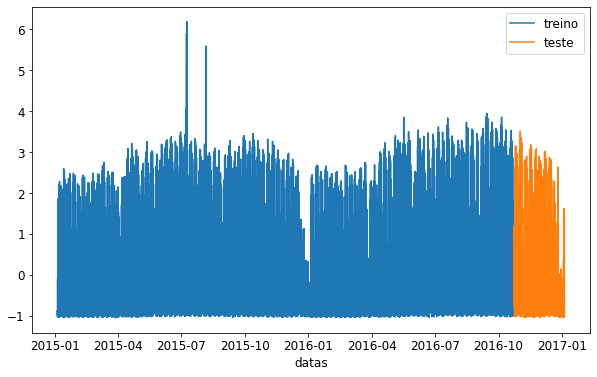

In [ ]:
# Visualização
sns.lineplot(x='datas', y=ytreino[:,0], label='treino', data=xtreino)
sns.lineplot(x='datas', y=yteste[:,0],  label='teste', data=xteste)
plt.show()

## <font color=orange>Janelas de deslocamento</font>

In [ ]:
# Vetor 
vetor_treino = pd.DataFrame(ytreino)[0]
vetor_teste = pd.DataFrame(yteste)[0]

In [ ]:
# Sequencia de subvetores com deslocamento
xtreino_w10, ytreino_w10 = separa_dados(vetor_treino, 10)
xteste_w10, yteste_w10 = separa_dados(vetor_teste, 10)

## <font color=orange><b>LSTM</b></font>





**LSTM** - Long Short Term Memory, destinado para estruturar uma memória de longo prazo.

Devido aos loops os pesos podem deixar de diminírem. Este processo é chamado de gradientes esvaindo, *vanishing gradient*. O uso do Glorot Uniform e do LSTM auxiliam em evitar esse fenômeno.

`activate_r

**RMSprop** - serve para evitar que o gradiente cresça muito

> Foi escolhido o RMSProp como otimizador dos pesos no treinamento da rede neural. O objetivo foi utilizar um otimizador adaptativo. Um otimizador adaptativo é capaz de controlar o gradiente e evitar que este cresça ou diminua muito. Entretanto, a escolha do RMSProp foi feita para chamar a atenção sobre o otimizador. Tanto o Adam quanto o RMSProp são adaptativos e seriam boas escolhas para a solução do problema.

[Outros otimizadores do Keras](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

### <font color=orange>Estrutura de dados para Redes Recorrentes</font>

O que a LSTM espera?

A entrada de redes recorrentes deve possuir a seguinte forma para a entrada (número de amostras, número de passos no tempo, e número de atributos por passo no tempo).

In [ ]:
# Reshape do treino
treino_0 = xtreino_w10.shape[0]
treino_1 = xtreino_w10.shape[1]

xtreino_w10_rr = xtreino_w10.reshape((treino_0, treino_1, 1))

In [ ]:
teste_0 = xteste_w10.shape[0]
teste_1 = xteste_w10.shape[1]
xteste_w10_rr = xteste_w10.reshape((teste_0, teste_1, 1))

### <font color=orange>Modelo LSTM</font>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

recorrente = Sequential()

recorrente.add(LSTM(
    units=128,  # equivalente a loops
    input_shape=(treino_1, 1)
))
recorrente.add(Dense(
    units=1
))

recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [ ]:
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Treinamento da rede
resultado = recorrente.fit(xtreino_w10_rr, ytreino_w10, 
    validation_data=(xteste_w10_rr, yteste_w10),
    epochs=100)

Epoch 1/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0769 - val_loss: 0.0356
Epoch 2/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0547 - val_loss: 0.0404
Epoch 3/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0468 - val_loss: 0.0245
Epoch 4/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0423 - val_loss: 0.0313
Epoch 5/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0398 - val_loss: 0.0258
Epoch 6/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0374 - val_loss: 0.0219
Epoch 7/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0356 - val_loss: 0.0214
Epoch 8/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0336 - val_loss: 0.0213
Epoch 9/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0329 - val_loss: 0.0322
Epoch 10/100
490/490 [==============================] - 6s 13ms/step - loss: 0.031

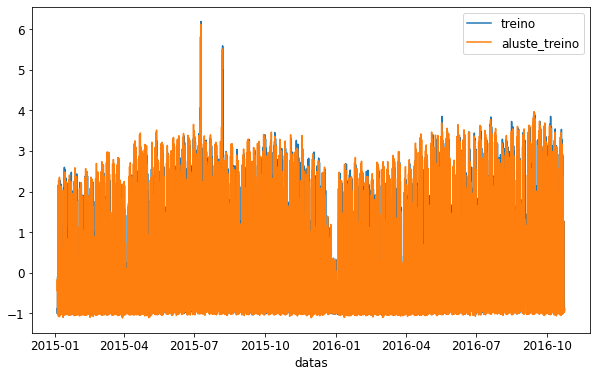

In [ ]:
y_ajustado = recorrente.predict(xtreino_w10_rr)

sns.lineplot(x='datas', y=ytreino[:,0],
    data=bikes[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_ajustado[:,0],
    data=bikes[0:15662], label='aluste_treino')

plt.xticks(rotation=70)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

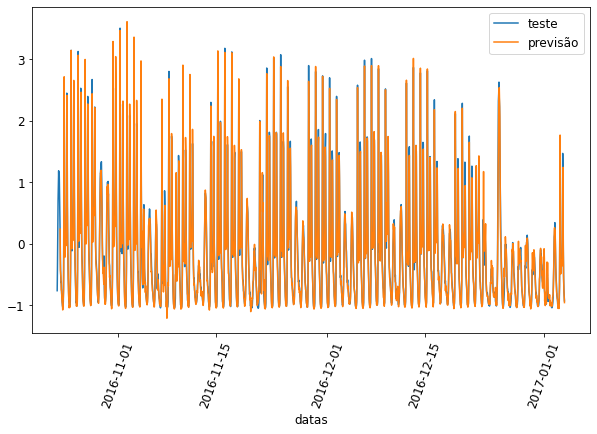

In [ ]:
y_predito = recorrente.predict(xteste_w10_rr)

sns.lineplot(x='datas', y=yteste[:,0],
    data=bikes[tamanho_treino:len(bikes)], label='teste')
sns.lineplot(x='datas', y=y_predito[:,0],
    data=bikes[tamanho_treino+10:len(bikes)], label='previsão')

plt.xticks(rotation=70)

## <font color=orange><b>GRU - Unidade recorrente fechada</b></font>

* Treinamento mais rápido, por ter menos parâmetros;
* LSTM conseguem lembrar sequencias maiores;

In [ ]:
from tensorflow.keras.layers import GRU

recorrente_g = Sequential()

recorrente_g.add(GRU(
    128,
    input_shape=(xtreino_w10_rr.shape[1], xtreino_w10_rr.shape[2]),
))
recorrente_g.add(Dense(
    units=1
))

recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp' )

In [ ]:
recorrente_g.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
resultado_g = recorrente_g.fit(xtreino_w10_rr, ytreino_w10, 
    validation_data=(xteste_w10_rr, yteste_w10),
    epochs=100)

Epoch 1/100
490/490 [==============================] - 8s 12ms/step - loss: 0.2148 - val_loss: 0.0736
Epoch 2/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0696 - val_loss: 0.0558
Epoch 3/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0501 - val_loss: 0.0345
Epoch 4/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0430 - val_loss: 0.0284
Epoch 5/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0396 - val_loss: 0.0228
Epoch 6/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0369 - val_loss: 0.0268
Epoch 7/100
490/490 [==============================] - 9s 18ms/step - loss: 0.0353 - val_loss: 0.0205
Epoch 8/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0337 - val_loss: 0.0231
Epoch 9/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0323 - val_loss: 0.0193
Epoch 10/100
490/490 [==============================] - 6s 12ms/step - loss: 0.031

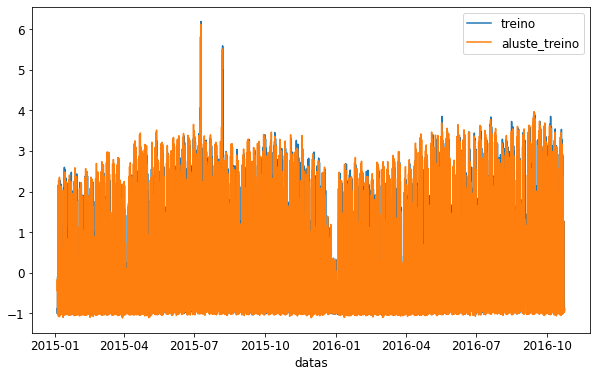

In [ ]:
y_ajustado_g = recorrente_g.predict(xtreino_w10_rr)

sns.lineplot(x='datas', y=ytreino[:,0],
    data=bikes[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_ajustado_g[:,0],
    data=bikes[0:15662], label='aluste_treino')

plt.xticks(rotation=70)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

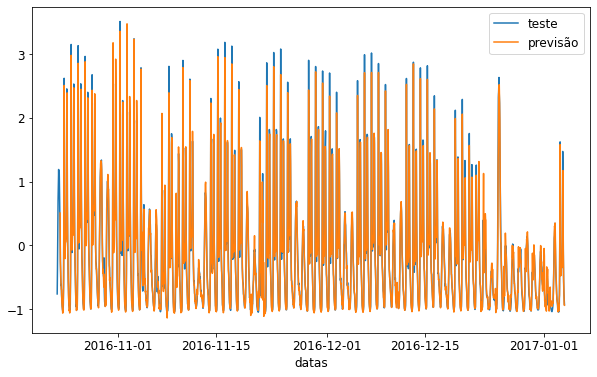

In [ ]:
y_predito_g = recorrente_g.predict(xteste_w10_rr)

sns.lineplot(x='datas', y=yteste[:,0],
    data=bikes[tamanho_treino:len(bikes)], label='teste')
sns.lineplot(x='datas', y=y_predito_g[:,0],
    data=bikes[tamanho_treino+10:len(bikes)], label='previsão')

plt.xticks(rotation=0)

# <font color=orange><b>Avaliação de modelo</b></font>

Através da comparação das perdas no treinamento e as perdas no teste é possível tentar identificar quando há ocorrência de <font color=orange>overfitting</font>.

No sobreajuste ocorre um ajuste muito bom aos dados de treino e ruim aos dados de teste.

In [ ]:
print(resultado_g.history.keys())

dict_keys(['loss', 'val_loss'])


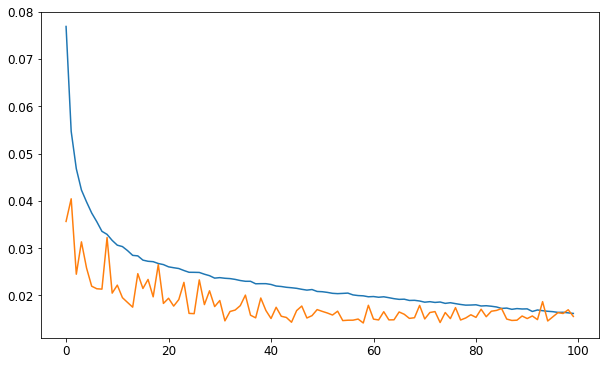

In [ ]:
# LSTM
plt.plot(resultado.history['loss'])  # treino
plt.plot(resultado.history['val_loss'])  # teste

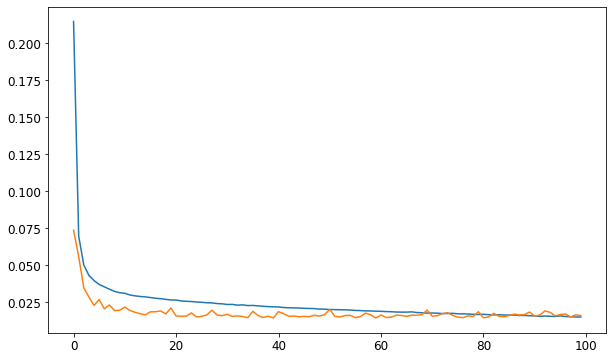

In [ ]:
# GRU
plt.plot(resultado_g.history['loss'])  # treino
plt.plot(resultado_g.history['val_loss'])  # teste
plt.legend(['treino', 'teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')